In [2]:
!pip install pyspark pandas matplotlib seaborn

In [3]:
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Создание SparkSession
spark = SparkSession.builder \
    .master("spark://spark-master:7077") \
    .appName("WordCount") \
    .getOrCreate()

In [5]:
# Чтение CSV файла
df = spark.read.csv("hdfs://namenode:8020/cars.csv", header=True, inferSchema=True)

In [6]:
# Вывод схемы и типов данных для датасета 
print("Схема данных для датасета 'cars.csv':")
df.printSchema()

Схема данных для датасета 'cars.csv':
root
 |-- manufacturer_name: string (nullable = true)
 |-- model_name: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- color: string (nullable = true)
 |-- odometer_value: integer (nullable = true)
 |-- year_produced: integer (nullable = true)
 |-- engine_fuel: string (nullable = true)
 |-- engine_has_gas: boolean (nullable = true)
 |-- engine_type: string (nullable = true)
 |-- engine_capacity: double (nullable = true)
 |-- body_type: string (nullable = true)
 |-- has_warranty: boolean (nullable = true)
 |-- state: string (nullable = true)
 |-- drivetrain: string (nullable = true)
 |-- price_usd: double (nullable = true)
 |-- is_exchangeable: boolean (nullable = true)
 |-- location_region: string (nullable = true)
 |-- number_of_photos: integer (nullable = true)
 |-- up_counter: integer (nullable = true)
 |-- feature_0: boolean (nullable = true)
 |-- feature_1: boolean (nullable = true)
 |-- feature_2: boolean (nullable =

In [8]:
# Подсчет общего количества записей
total_records = df.count()

# Вывод результата
print(f"Общее количество записей: {total_records}")

Общее количество записей: 38531


In [11]:
# Удаление записей с отсутствующими значениями в ключевых полях 
cleaned_cars_df = df.dropna(subset=["price_usd", "odometer_value"])
# Проверка результатов
print("Количество записей в датасете 'cars.csv' после очистки:")
print(cleaned_cars_df.count())

Количество записей в датасете 'cars.csv' после очистки:
38531


In [12]:
from pyspark.sql.functions import col, avg, round as spark_round

In [13]:
# Вычисление средней цены для каждой марки автомобиля и округление до целого числа
average_price_by_manufacturer = df.groupBy("manufacturer_name") \
    .agg(spark_round(avg("price_usd"), 0).alias("average_price_usd"))

In [14]:
# Сортировка по средней цене в порядке убывания
average_price_by_manufacturer = average_price_by_manufacturer.orderBy(col("average_price_usd").desc()).limit(10)

In [15]:
# Вывод результата
average_price_by_manufacturer.show()

+-----------------+-----------------+
|manufacturer_name|average_price_usd|
+-----------------+-----------------+
|          Porsche|          18630.0|
|           Jaguar|          17813.0|
|            Lexus|          17131.0|
|       Land Rover|          15195.0|
|         Infiniti|          13795.0|
|            Skoda|          13795.0|
|             Mini|          13134.0|
|            Buick|          12876.0|
|            Acura|          12773.0|
|         Cadillac|          11093.0|
+-----------------+-----------------+



In [16]:
# Преобразование в Pandas DataFrame для визуализации
average_price_pandas = average_price_by_manufacturer.toPandas()

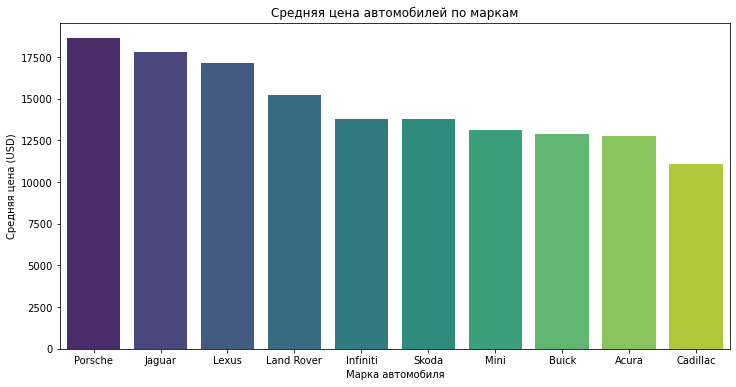

In [17]:
# Визуализация с помощью Seaborn: столбчатая диаграмма
plt.figure(figsize=(12, 6))
sns.barplot(data=average_price_pandas, x='manufacturer_name', y='average_price_usd', palette='viridis')
plt.title("Средняя цена автомобилей по маркам")
plt.xlabel("Марка автомобиля")
plt.ylabel("Средняя цена (USD)")
#plt.xticks(rotation=90)
plt.show()

In [18]:
# Сортировка по средней цене в порядке убывания
average_price_by_manufacturer = average_price_by_manufacturer.orderBy(col("average_price_usd").desc()).limit(10)

In [19]:
# Преобразование в Pandas DataFrame для визуализации
average_price_pandas = average_price_by_manufacturer.toPandas()

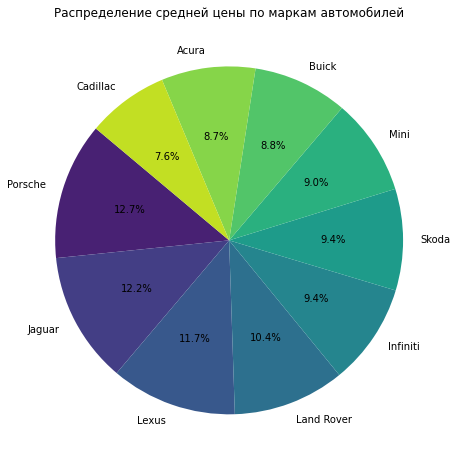

In [20]:
# Визуализация с помощью Matplotlib: круговая диаграмма
plt.figure(figsize=(8, 8))
plt.pie(
    average_price_pandas['average_price_usd'],
    labels=average_price_pandas['manufacturer_name'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("viridis", len(average_price_pandas))
)
plt.title('Распределение средней цены по маркам автомобилей')
plt.show()